In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


%matplotlib inline
pd.options.display.max_columns = None

weather_data = wtで省略

In [2]:
wt = pd.read_csv("data2.csv", encoding="shift-jis")
wt.head()

,年月日,最高気温(℃),最低気温(℃),平均気温(℃),平均雲量(10分比),天気概況(昼：06時〜18時),晴 or 雨
0,2017/1/1,14.4,0.0,6.9,0.0,快晴,1
1,2017/1/2,13.3,0.8,5.9,3.3,曇後晴,1
2,2017/1/3,13.3,0.4,7.0,0.7,晴,1
3,2017/1/4,14.4,-1.0,6.0,0.7,快晴,1
4,2017/1/5,9.3,2.6,5.4,2.0,晴,1


In [3]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   年月日              1096 non-null   object 
 1   最高気温(℃)          1096 non-null   float64
 2   最低気温(℃)          1096 non-null   float64
 3   平均気温(℃)          1096 non-null   float64
 4   平均雲量(10分比)       762 non-null    float64
 5   天気概況(昼：06時〜18時)  1096 non-null   object 
 6   晴 or 雨           1096 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 60.1+ KB


In [4]:
wt_r = wt[["年月日", "最高気温(℃)", "最低気温(℃)", "平均気温(℃)", "天気概況(昼：06時〜18時)", "晴 or 雨"]]

wt_r = wt_r.rename(columns={'年月日':'Year', '最高気温(℃)':'max_temperature', '最低気温(℃)':'min_temperature', 
                           '平均気温(℃)':'avg_temperature', '天気概況(昼：06時〜18時)':'Weather conditions', '晴 or 雨':'sun_rain'})

wt_r.head()

,Year,max_temperature,min_temperature,avg_temperature,Weather conditions,sun_rain
0,2017/1/1,14.4,0.0,6.9,快晴,1
1,2017/1/2,13.3,0.8,5.9,曇後晴,1
2,2017/1/3,13.3,0.4,7.0,晴,1
3,2017/1/4,14.4,-1.0,6.0,快晴,1
4,2017/1/5,9.3,2.6,5.4,晴,1


In [5]:
is_sun_rain = (wt_r['sun_rain'] == 0).astype(np.int64)

wt_r['is_sun_rain'] = is_sun_rain
wt_r.head()

,Year,max_temperature,min_temperature,avg_temperature,Weather conditions,sun_rain,is_sun_rain
0,2017/1/1,14.4,0.0,6.9,快晴,1,0
1,2017/1/2,13.3,0.8,5.9,曇後晴,1,0
2,2017/1/3,13.3,0.4,7.0,晴,1,0
3,2017/1/4,14.4,-1.0,6.0,快晴,1,0
4,2017/1/5,9.3,2.6,5.4,晴,1,0


In [6]:
wt_r2 = wt_r[["Year", "max_temperature", "min_temperature", "avg_temperature", "sun_rain", "is_sun_rain"]]
wt_r2.head()

,Year,max_temperature,min_temperature,avg_temperature,sun_rain,is_sun_rain
0,2017/1/1,14.4,0.0,6.9,1,0
1,2017/1/2,13.3,0.8,5.9,1,0
2,2017/1/3,13.3,0.4,7.0,1,0
3,2017/1/4,14.4,-1.0,6.0,1,0
4,2017/1/5,9.3,2.6,5.4,1,0


In [7]:
wt_r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             1096 non-null   object 
 1   max_temperature  1096 non-null   float64
 2   min_temperature  1096 non-null   float64
 3   avg_temperature  1096 non-null   float64
 4   sun_rain         1096 non-null   int64  
 5   is_sun_rain      1096 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 51.5+ KB


In [8]:
X = wt_r2[["max_temperature", "min_temperature", "avg_temperature"]]
Y = wt_r2["is_sun_rain"]

In [9]:
print(X.shape)
print(Y.shape)

(1096, 3)
(1096,)


In [10]:
X1 = wt_r[["max_temperature", "min_temperature", "avg_temperature"]]
Y1 = wt_r["sun_rain"]

In [11]:
print(X1.shape)
print(Y1.shape)

(1096, 3)
(1096,)


In [12]:
Y2 = to_categorical(Y)
Y2.shape

(1096, 2)

In [13]:
print(X.shape)
print(Y2.shape)

(1096, 3)
(1096, 2)


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid= train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [15]:
print("Y_train=", Y_train.shape, "X_train=", X_train.shape)
print("Y_test=", Y_test.shape, "X_test=", X_test.shape)
print("Y_valid=", Y_valid.shape, "X_valid=", X_valid.shape)

Y_train= (536,) X_train= (536, 3)
Y_test= (329,) X_test= (329, 3)
Y_valid= (231,) X_valid= (231, 3)


In [35]:
model = keras.Sequential()

model.add(Dense(9, activation='relu', input_shape=(3, )))

model.add(Dense(3, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = "rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 9)                 36        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 3         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [36]:
%%time

log = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1)],
               validation_data=(X_valid, Y_valid))

Epoch 1/50
17/17 [==============================] - 0s 11ms/step - loss: 1.3868 - accuracy: 0.4478 - val_loss: 0.7888 - val_accuracy: 0.4632
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 0.7074 - accuracy: 0.5951 - val_loss: 0.6895 - val_accuracy: 0.4286
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6224 - accuracy: 0.6343 - val_loss: 0.5798 - val_accuracy: 0.7316
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5617 - accuracy: 0.6959 - val_loss: 0.5413 - val_accuracy: 0.5584
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7071 - val_loss: 0.5022 - val_accuracy: 0.7273
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.6828 - val_loss: 0.4860 - val_accuracy: 0.7316
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5051 - accuracy: 0.6959 - val_loss: 0.4531 - val_accuracy: 0.7965
Epoch 8/50
17/17 [=

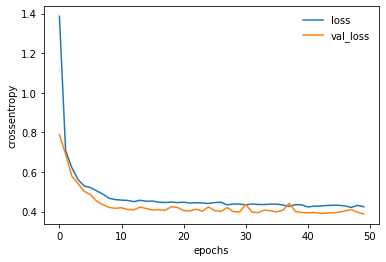

In [37]:
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

In [38]:
Y_pred = model.predict(X_test)
Y_pred

array([[0.08469051],
       [0.17235395],
       [0.14576277],
       [0.19730482],
       [0.39242733],
       [0.38892025],
       [0.09314445],
       [0.35796297],
       [0.58950275],
       [0.2688293 ],
       [0.04244295],
       [0.31991833],
       [0.004922  ],
       [0.18301341],
       [0.12986264],
       [0.5084109 ],
       [0.4616205 ],
       [0.3688412 ],
       [0.49300244],
       [0.23299527],
       [0.21675232],
       [0.45558494],
       [0.14799327],
       [0.53602606],
       [0.17752668],
       [0.142394  ],
       [0.32239753],
       [0.03342322],
       [0.35767257],
       [0.6142435 ],
       [0.26778257],
       [0.07398909],
       [0.71675277],
       [0.17590708],
       [0.25615332],
       [0.24600393],
       [0.04288146],
       [0.5042733 ],
       [0.1015448 ],
       [0.02902418],
       [0.04217595],
       [0.22116715],
       [0.28548977],
       [0.2602793 ],
       [0.4920133 ],
       [0.49170256],
       [0.03902674],
       [0.251

In [39]:
# 2次元配列で表示
Y_pred_cls = (Y_pred > 0.5).astype("int32")
Y_pred_cls

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [40]:
# 形状を目的変数に合わせる⇒2次元から、1次元配列に変更
Y_pred_ = Y_pred_cls.reshape(-1)
Y_pred_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [41]:
Y_test

1062    0
27      0
718     0
491     1
196     1
       ..
493     1
62      0
79      1
299     0
193     0
Name: is_sun_rain, Length: 329, dtype: int64

In [42]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       225
           1       0.81      0.48      0.60       104

    accuracy                           0.80       329
   macro avg       0.80      0.71      0.73       329
weighted avg       0.80      0.80      0.78       329

